In [10]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [13]:
!cp kaggle.json ~/.kaggle

In [14]:
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                               29MB  2023-11-16 01:38:36           2191        206  1.0              
muhammadbinimran/housing-price-prediction-data              Housing Price Prediction Data                       763KB  2023-11-21 17:56:32          10134        171  1.0              
thedevastator/netflix-imdb-scores                           Netflix IMDB Scores                                 699KB  2023-12-03 14:10:34           4236         75  1.0              
thedrcat/daigt-proper-train-dataset                         DAIGT Proper Train D

In [16]:
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset

 99% 1.43G/1.45G [00:23<00:00, 83.1MB/s]
100% 1.45G/1.45G [00:23<00:00, 64.7MB/s]


In [17]:
!unzip wildfire-prediction-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: valid/nowildfire/-73.481422,45.559789.jpg  
  inflating: valid/nowildfire/-73.481565,45.467244.jpg  
  inflating: valid/nowildfire/-73.483407,45.637554.jpg  
  inflating: valid/nowildfire/-73.48589

In [24]:
!rm -r /content/wildfire_recognition

In [25]:
import os
import shutil

# Path ke direktori utama tempat Anda menyimpan folder train, valid, dan test
base_path = "/content/"

new_path = os.path.join(base_path, "wildfire_recognition")

os.makedirs(new_path, exist_ok=True)

for subset in ["train", "valid", "test"]:
    subset_path = os.path.join(base_path, subset)

    for class_label in ["nowildfire", "wildfire"]:
        class_path = os.path.join(subset_path, class_label)
        new_class_path = os.path.join(new_path, class_label)

        os.makedirs(new_class_path, exist_ok=True)

        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            shutil.copy(file_path, new_class_path)


In [38]:
from PIL import Image
import os

print(f"total kelas no wildfire: {len(os.listdir('/content/wildfire_recognition/nowildfire'))}")
print(f"total kelas wildfire: {len(os.listdir('/content/wildfire_recognition/wildfire'))}")


# Path ke direktori nowildfire
nowildfire_path = "/content/wildfire_recognition/nowildfire"

image_files = [file for file in os.listdir(nowildfire_path) if file.endswith(('.jpg'))]

first_10_images = image_files[:10]

for image_file in first_10_images:
    image_path = os.path.join(nowildfire_path, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"Resolusi gambar {image_file}: {width} x {height}")


total kelas no wildfire: 20140
total kelas wildfire: 22710
Resolusi gambar -73.799732,45.523545.jpg: 350 x 350
Resolusi gambar -114.088891,51.15233.jpg: 350 x 350
Resolusi gambar -79.419656,43.648544.jpg: 350 x 350
Resolusi gambar -123.154381,49.108256.jpg: 350 x 350
Resolusi gambar -113.963158,50.987067.jpg: 350 x 350
Resolusi gambar -73.734404,45.481957.jpg: 350 x 350
Resolusi gambar -73.475918,45.564819.jpg: 350 x 350
Resolusi gambar -114.085194,51.13824.jpg: 350 x 350
Resolusi gambar -113.944162,51.13079.jpg: 350 x 350
Resolusi gambar -122.8356,49.153436.jpg: 350 x 350


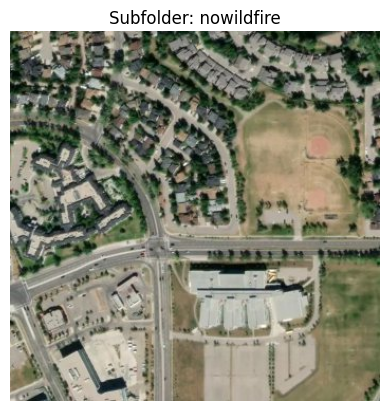

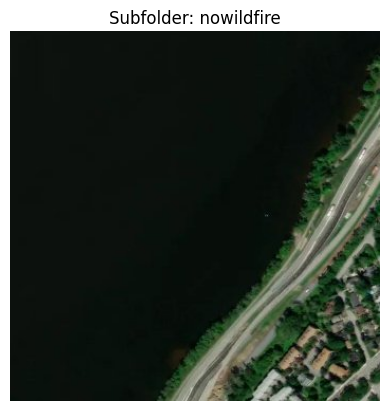

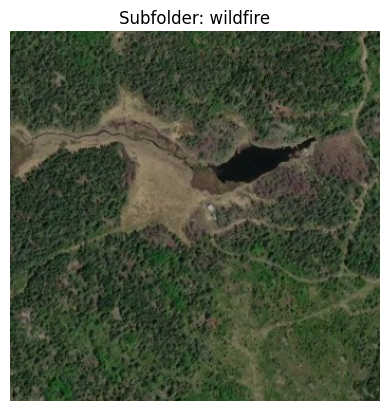

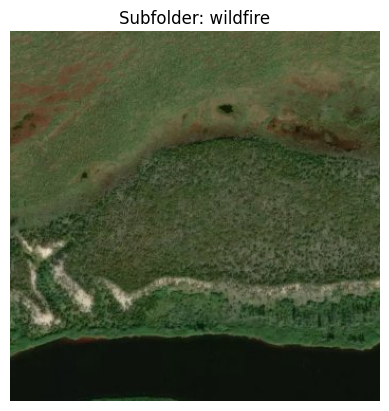

In [39]:
import random
import matplotlib.pyplot as plt

subfolders = ['nowildfire', 'wildfire']
for subfolder in subfolders:
    subfolder_path = os.path.join('/content/wildfire_recognition/', subfolder)
    files = os.listdir(subfolder_path)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Mengambil dua gambar secara acak
    random_images = random.sample(image_files, 2)

    for image_name in random_images:
        image_path = os.path.join(subfolder_path, image_name)
        with Image.open(image_path) as img:
            plt.imshow(img)
            plt.title(f"Subfolder: {subfolder}")
            plt.axis('off')
            plt.show()


In [102]:
def is_image_corrupt(image_path):
    try:
        img = tf.io.read_file(image_path)
        img = tf.image.decode_image(img)
        return True  # Image is not corrupt
    except tf.errors.InvalidArgumentError as e:
        print(f"Error reading image {image_path}: {e}")
        os.remove(image_path)
        return False  # Image is corrupt

folder_path = ['nowildfire', 'wildfire']

for folder in folder_path:
  print(folder)
  for filename in os.listdir('/content/wildfire_recognition/' + folder + '/'):
    is_image_corrupt('/content/wildfire_recognition/' + folder + '/' + filename)

nowildfire
Error reading image /content/wildfire_recognition/nowildfire/-114.152378,51.027198.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeImage] name: 
wildfire
Error reading image /content/wildfire_recognition/wildfire/-73.15884,46.38819.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window. [Op:DecodeImage] name: 


In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path dataset
dataset_path = '/content/wildfire_recognition/'

# Konfigurasi ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=7,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # 80% pelatihan, 20% validasi
)

# Membuat generator pelatihan
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=8,
    class_mode='binary',
    subset='training'
)

# Membuat generator validasi
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=8,
    class_mode='binary',
    subset='validation'
)

# Menampilkan jumlah total sampel dalam dataset yang telah dimodifikasi
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(validation_generator.filenames)

print("Jumlah total sampel di dalam dataset pelatihan:", total_train_samples)
print("Jumlah total sampel di dalam dataset validasi:", total_validation_samples)


Found 34280 images belonging to 2 classes.
Found 8568 images belonging to 2 classes.
Jumlah total sampel di dalam dataset pelatihan: 34280
Jumlah total sampel di dalam dataset validasi: 8568


In [110]:
print(f"total kelas no wildfire: {len(os.listdir('/content/wildfire_recognition/nowildfire'))}")
print(f"total kelas wildfire: {len(os.listdir('/content/wildfire_recognition/wildfire'))}")

total kelas no wildfire: 20139
total kelas wildfire: 22709


In [111]:
import tensorflow as tf
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')   ])

In [112]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy', Recall(), Precision()])

In [115]:
import datetime
import os
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping

num_epochs = 3

experiment_name = f"wildfire_recog_(256x256)_{num_epochs}-epoch"
date_now = datetime.datetime.now().strftime("_%d-%m-%Y_%H-%M-%S")

lokasiModel = os.path.join(f"train//{experiment_name + date_now}", experiment_name + '.h5')
lokasiCSV = os.path.join(f"train//{experiment_name + date_now}", experiment_name + '.csv')

callbacks = [
    ModelCheckpoint(lokasiModel, verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-6, verbose=1),
    CSVLogger(lokasiCSV),
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=False)
]

In [116]:
history = model.fit(train_generator, epochs=num_epochs, batch_size = 512,
                    validation_data=validation_generator, callbacks=callbacks)

Epoch 1/3
4285/4285 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9261 - recall_8: 0.9418 - precision_8: 0.9206
Epoch 1: val_loss improved from inf to 0.12940, saving model to train//wildfire_recog_(256x256)_3-epoch_20-12-2023_09-15-28/wildfire_recog_(256x256)_3-epoch.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4285/4285 [==============================] - 704s 164ms/step - loss: 0.1994 - accuracy: 0.9261 - recall_8: 0.9418 - precision_8: 0.9206 - val_loss: 0.1294 - val_accuracy: 0.9448 - val_recall_8: 0.9749 - val_precision_8: 0.9250 - lr: 0.0010
Epoch 2/3
4285/4285 [==============================] - ETA: 0s - loss: 0.1501 - accuracy: 0.9450 - recall_8: 0.9576 - precision_8: 0.9398
Epoch 2: val_loss did not improve from 0.12940
4285/4285 [==============================] - 694s 162ms/step - loss: 0.1501 - accuracy: 0.9450 - recall_8: 0.9576 - precision_8: 0.9398 - val_loss: 0.1330 - val_accuracy: 0.9421 - val_recall_8: 0.9432 - val_precision_8: 0.9474 - lr: 0.0010
Epoch 3/3
4285/4285 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9534 - recall_8: 0.9652 - precision_8: 0.9479
Epoch 3: val_loss did not improve from 0.12940
4285/4285 [==============================] - 724s 169ms/step - loss: 0.1331 - accuracy: 0.9534 - recall_8: 0.9652 - precision_8: 0.9479 - val_loss: 0.

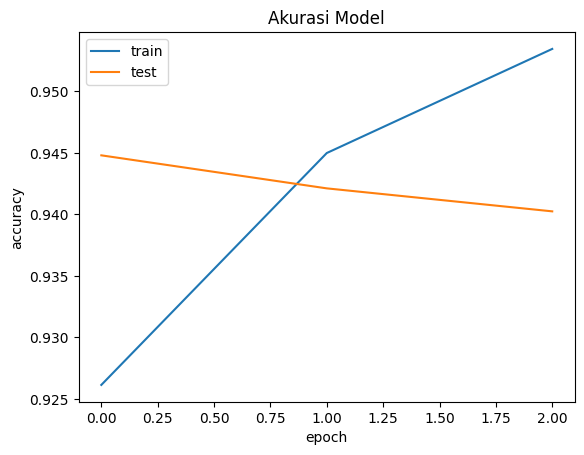

In [117]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

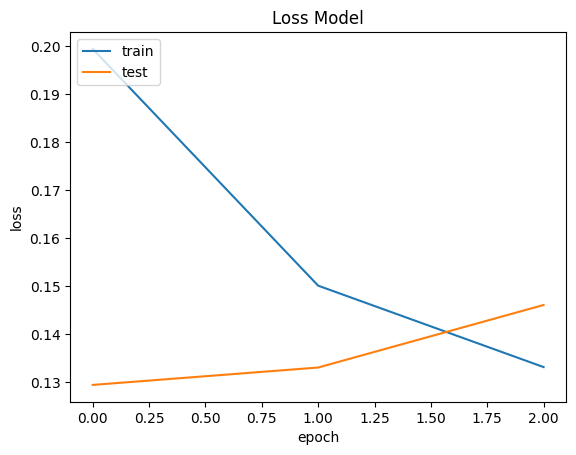

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
# Load the Keras model from the HDF5 file
model = tf.keras.models.load_model('/content/train/wildfire_recog_(256x256)_3-epoch_20-12-2023_09-15-28/wildfire_recog_(256x256)_3-epoch.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/content/train/wildfire_recog_(256x256)_3-epoch_20-12-2023_09-15-28/wildfire_recog.tflite', 'wb') as f:
    f.write(tflite_model)